# ANALYSIS 2: EXPLORATORY ANALYSIS OF PRODUCT AND REVIEWS (1999-2014)
- Number of Reviews over the years.
- Number of Reviews by month over the years.
- Distribution of 'Overall Rating' for 2.5 million 'Clothing Shoes and Jewellery' reviews on Amazon.
- Yearly average 'Overall Ratings' over the years.
- Distribution of helpfulness on 'Clothing Shoes and Jwellery' reviews on Amazon.
- Distributution of length of reviews on Amazon.
- Distribution of product prices of 'Clothing Shoes and Jewellery' category on Amazon.
- Distribution of 'Overall Rating' of Amazon 'Clothing Shoes and Jewellery'.
- Product Price V/S Overall Rating of reviews written for products.
- Average Review Length V/S Product Price for Amazon products.
- Distribution of 'Number of Reviews' written by each of the Amazon 'Clothing Shoes and Jewellery' user.
- Distribution of 'Average Rating' written by each of the Amazon 'Clothing Shoes and Jewellery' users.
- Distribution of Helpfulness of reviews written by Amazon 'Clothing Shoes and Jewellery' users.
- Average Rating V/S Avg Helpfulness written by Amazon 'Clothing Shoes and Jewellery' user
- Helpfulness VS Average Length of reviews written by Amazon 'Clothing Shoes and Jewellery' users.
-----------------------------------

Importing all the required Libraries

In [1]:
# importing all the required Libraries
import glob
import json
import csv
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import calendar

Creating a path for Review file 'ReviewSample.json' which is the input dataset for Exploratory Analysis.

In [2]:
file=glob.glob('../Data/Tested_Data/ReviewSample.json')

Cleaning of 'ReviewSample.json' file and importing the data as pandas DataFrame.

In [3]:
# Reading a multiple json files from a single json file 'ReviewSample.json'.
review=[]
with open(file[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        review.append(i)
        
# Making a list of Tuples containg all the data of json files.
reviewDataframe=[]
for x in review:
    try:
        jdata=json.loads(x)
        reviewDataframe.append((jdata['reviewerID'],jdata['asin'],jdata['reviewerName'],jdata['helpful'][0],jdata['helpful'][1],jdata['reviewText'],jdata['overall'],jdata['summary'],jdata['unixReviewTime'],jdata['reviewTime'])) 
    except:
        pass
    
# Creating a dataframe using the list of Tuples got in the previous step.
dataset=pd.DataFrame(reviewDataframe,columns=['Reviewer_ID','Asin','Reviewer_Name','helpful_UpVote','Total_Votes','Review_Text','Rating','Summary','Unix_Review_Time','Review_Time'])

Converting the data type of 'Review_Time' column in the Dataframe 'dataset' to datetime format.

In [4]:
dataset['Review_Time']= pd.to_datetime(dataset['Review_Time'])

Creating an Addtional column as 'Month' in Datatframe 'dataset' for Month by taking the month part of 'Review_Time' column.

In [5]:
dataset['Month']=dataset['Review_Time'].dt.month

Creating an Addtional column as 'Year' in Datatframe 'dataset' for Year by taking the year part of 'Review_Time' column.

In [6]:
dataset['Year']=dataset['Review_Time'].dt.year

# NUMBER OF REVIEWS OVER THE YEARS.

Grouping by year and taking the count of reviews for each year.

In [7]:
Yearly=dataset.groupby(['Year'])['Reviewer_ID'].count().reset_index()

Renaming the column 'Reviewer_ID' to 'Number_Of_Reviews'

In [8]:
Yearly=Yearly.rename(columns={'Reviewer_ID': 'Number_Of_Reviews'})

Displaying few rows of the output.

In [9]:
Yearly.head()

,Year,Number_Of_Reviews
0,1999,4
1,2000,89
2,2001,68
3,2002,112
4,2003,276


In [10]:
Yearly.to_csv('../Analysis/Analysis_2/Year_VS_Reviews.csv')

Line Plot for number of reviews over the years.

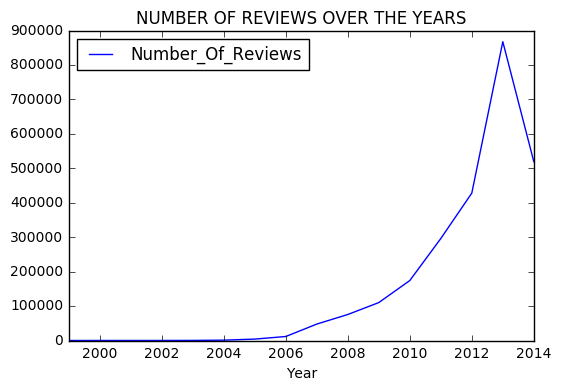

In [11]:
Yearly.plot(x="Year",y="Number_Of_Reviews",kind="line",title="NUMBER OF REVIEWS OVER THE YEARS")
plt.show()

# NUMBER OF REVIEWS BY MONTH (1999-2014)

Grouping on Month and getting the count.

In [12]:
Monthly=dataset.groupby(['Month'])['Reviewer_ID'].count().reset_index()

Replacing digits of 'Month' column in 'Monthly' dataframe with words using 'Calendar' library

In [13]:
# Replacing digits of 'Month' column in 'Monthly' dataframe with words using 'Calendar' library
Monthly['Month'] = Monthly['Month'].apply(lambda x: calendar.month_name[x])
Monthly=Monthly.rename(columns={'Reviewer_ID':'Number_of_Reviews'})

In [14]:
Monthly.head()

,Month,Number_of_Reviews
0,January,306079
1,February,228285
2,March,233105
3,April,204342
4,May,209967


In [16]:
Monthly.to_csv('../Analysis/Analysis_2/Month_VS_Reviews.csv')

Bar Chart Plot for number of reviews over the Month

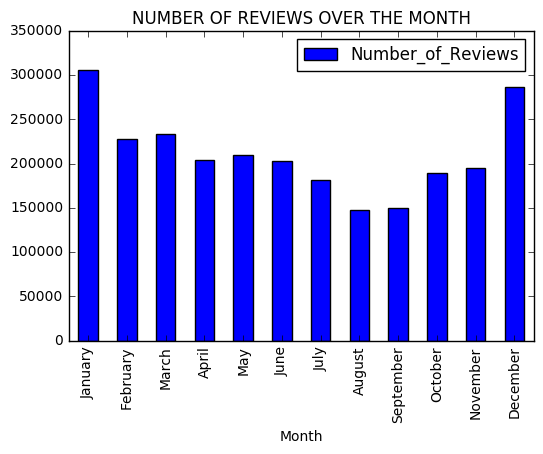

In [17]:
Monthly.plot(x="Month",y="Number_of_Reviews",kind="bar",title="NUMBER OF REVIEWS OVER THE MONTH")
plt.show()

# DISTRIBUTION OF OVERALL RATING FOR 'CLOTHING SHOES AND JEWELERY' CATEGORY REVIEWS ON AMAZON

Grouping on Rating and getting the count.

In [18]:
Overall_Rating=dataset.groupby(['Rating'])['Reviewer_ID'].count().reset_index()

In [19]:
Overall_Rating=Overall_Rating.rename(columns={'Reviewer_ID':'Number_of_Reviews'})
Overall_Rating

,Rating,Number_of_Reviews
0,1.0,175487
1,2.0,152033
2,3.0,239307
3,4.0,489266
4,5.0,1479520


In [20]:
Overall_Rating.to_csv('../Analysis/Analysis_2/Rating_VS_Reviews.csv')

Bar Chart Plot for Distribution of Rating

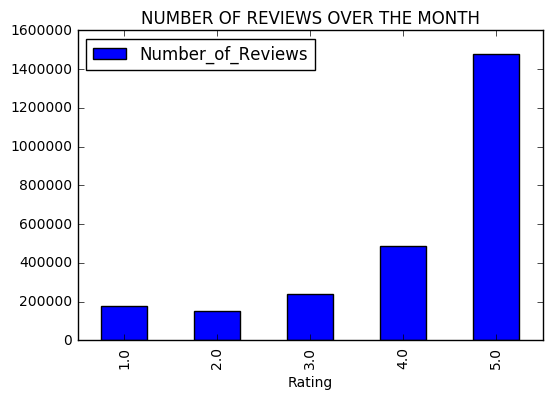

In [21]:
Overall_Rating.plot(x="Rating",y="Number_of_Reviews",kind="bar",title="NUMBER OF REVIEWS OVER THE MONTH")
plt.show()

# AVERAGE OVERALL RATINGS OVER THE YEARS (1999-2014)

Grouping on Year and getting the mean.

In [22]:
Yearly_Avg_Rating=dataset.groupby(['Year'])['Rating'].mean().reset_index()

Calculating the Moving Average ith window of '3' to confirm the trend.

In [23]:
Yearly_Avg_Rating['Moving_Average']=Yearly_Avg_Rating['Rating'].rolling(window=3).mean()

In [24]:
Yearly_Avg_Rating.head()

,Year,Rating,Moving_Average
0,1999,4.750000,NaN
1,2000,4.404494,NaN
2,2001,4.191176,4.448557
3,2002,4.187500,4.261057
4,2003,4.264493,4.214390


In [25]:
Yearly_Avg_Rating.to_csv('../Analysis/Analysis_2/Yearly_Avg_Rating.csv')

Bar Chart Plot for average overall ratings over the years

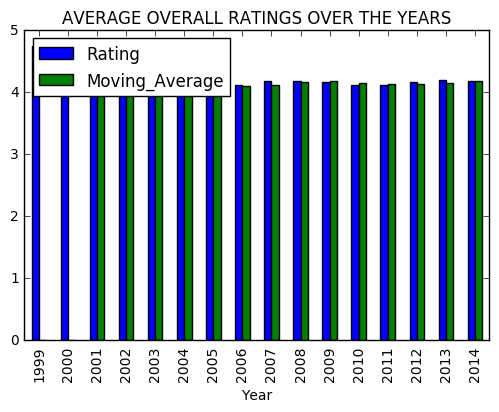

In [26]:
Yearly_Avg_Rating.plot(x="Year",y=["Rating","Moving_Average"],kind="bar",title="AVERAGE OVERALL RATINGS OVER THE YEARS")
plt.show()

# DISTRIBUTION OF HELPFULNESS OF 'CLOTHING SHOES AND JEWELLERY' REVIEWS ON AMAZON

Only taking required columns and converting their data type

In [27]:
Helpfulness=dataset[['helpful_UpVote','Total_Votes']]
Helpfulness['helpful_UpVote']=Helpfulness['helpful_UpVote'].astype(float)
Helpfulness['Total_Votes']=Helpfulness['Total_Votes'].astype(float)

Calculating helpfulnes Percentage and replacing Nan with 0

In [28]:
Helpfulness['Percentage']=(Helpfulness['helpful_UpVote']/Helpfulness['Total_Votes'])*100
Helpfulness=Helpfulness.fillna(0)

Creating an Interval of 10 for percentage Value.

In [29]:
result_Helpfulness=Helpfulness.groupby(pd.cut(Helpfulness.Percentage,np.arange(0, 101, 10))).count()
result_Helpfulness=result_Helpfulness.rename(columns={'Percentage':'Count'})
result_Helpfulness=result_Helpfulness.reset_index()

In [30]:
result_Helpfulness.head()

,Percentage,helpful_UpVote,Total_Votes,Count
0,"(0, 10]",1201,1201,1201
1,"(10, 20]",4501,4501,4501
2,"(20, 30]",5109,5109,5109
3,"(30, 40]",12780,12780,12780
4,"(40, 50]",62843,62843,62843


In [31]:
result_Helpfulness[["Percentage","Count"]].to_csv('../Analysis/Analysis_2/Helpfuness_Percentage_Distribution.csv')

Bar Plot for distribution of helpfulness of reviews on Amazon

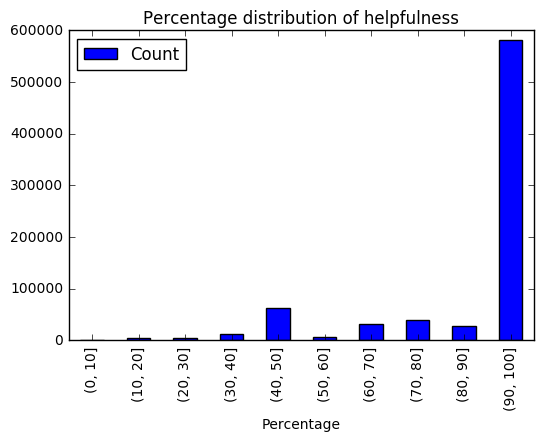

In [32]:
result_Helpfulness.plot(x="Percentage",y="Count",kind="bar",title="Percentage distribution of helpfulness")
plt.show()

# DISTRIBUTUTION OF LENGTH OF REVIEWS ON AMAZON

In [33]:
Review_Length=dataset[['Reviewer_ID','Reviewer_Name','Review_Text']]

In [34]:
# Word count
Review_Length['Word_Length']=Review_Length['Review_Text'].apply(lambda x: len(x.split()))

In [35]:
# character count
Review_Length['Character_Length']=Review_Length['Review_Text'].apply(lambda x: len(x))

In [36]:
Review_Length.head()

,Reviewer_ID,Reviewer_Name,Review_Text,Word_Length,Character_Length
0,A2XVJBSRI3SWDI,abigail,Perfect red tutu for the price. I baught it as...,22,113
1,A2G0LNLN79Q6HR,"aj_18 ""Aj_18""",This was a really cute tutu the only problem i...,28,136
2,A2R3K1KX09QBYP,alert consumer,the tutu color was very nice. the only issue w...,48,236
3,A19PBP93OF896,"Alinna Satake ""Can't Stop Eating""",My 3-yr-old daughter received this as a gift f...,116,672
4,A1P0IHU93EF9ZK,Amanda,Bought it for my daughters first birthday whic...,28,143


Creating an Interval of 100 for Charcters and Words Value.

In [37]:
Char_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Character_Length,np.arange(0, 1501, 100))).count()
Char_Review_Length=Char_Review_Length.rename(columns={'Character_Length':'Count'})
result_Char_Review_Length=Char_Review_Length.reset_index()

Word_Review_Length=Review_Length.groupby(pd.cut(Review_Length.Word_Length,np.arange(0, 801, 100))).count()
Word_Review_Length=Word_Review_Length.rename(columns={'Word_Length':'Count'})
result_Word_Review_Length=Word_Review_Length.reset_index()

In [39]:
result_Char_Review_Length[["Character_Length","Count"]].to_csv('../Analysis/Analysis_2/Character_Length_Distribution.csv')
result_Word_Review_Length[["Word_Length","Count"]].to_csv('../Analysis/Analysis_2/Word_Length_Distribution.csv')

In [40]:
result_Char_Review_Length[["Character_Length","Count"]].head()

,Character_Length,Count
0,"(0, 100]",117262
1,"(100, 200]",1131747
2,"(200, 300]",487715
3,"(300, 400]",279580
4,"(400, 500]",168718


Bar Plot for distribution of Length of reviews on Amazon

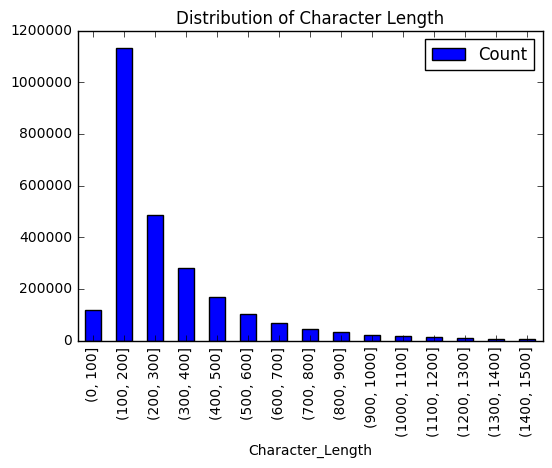

In [41]:
result_Char_Review_Length.plot(x="Character_Length",y="Count",kind="bar",title="Distribution of Character Length")
plt.show()

In [42]:
result_Word_Review_Length[["Word_Length","Count"]].head()

,Word_Length,Count
0,"(0, 100]",2220360
1,"(100, 200]",250447
2,"(200, 300]",43319
3,"(300, 400]",12254
4,"(400, 500]",4550


Bar Plot for distribution of Length of reviews on Amazon

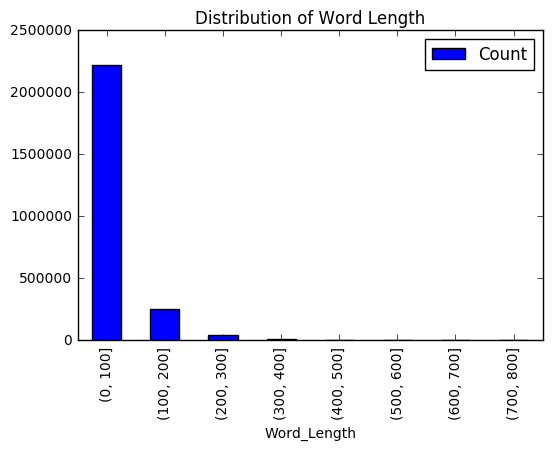

In [43]:
result_Word_Review_Length.plot(x="Word_Length",y="Count",kind="bar",title="Distribution of Word Length")
plt.show()

# DISTRIBUTION OF PRICES OF 'CLOTHING SHOES AND JEWELERY' ON AMAZON

Cleaning of 'ProductSample.json' file and importing the data as pandas DataFrame.

In [44]:
file2=glob.glob('../Data/Tested_Data/ProductSample.json')

In [45]:
product=[]
with open(file2[0]) as data_file:
    data=data_file.read()
    for i in data.split('\n'):
        product.append(i)

In [46]:
productDataframe=[]
for x in product:
    try:
        y=x.replace("'",'"')
        jdata=json.loads(y)
        productDataframe.append((jdata['asin'],jdata['price'])) 
    except:
        pass

In [47]:
Product_dataset=pd.DataFrame(productDataframe,columns=['Asin','Price'])

Segregating the product based on price range

In [48]:
price10=Product_dataset[(Product_dataset.Price > 0) & (Product_dataset.Price <= 10)]
price50=Product_dataset[(Product_dataset.Price > 10) & (Product_dataset.Price <= 50)]
price100=Product_dataset[(Product_dataset.Price > 50) & (Product_dataset.Price <= 100)]
price200=Product_dataset[(Product_dataset.Price > 100) & (Product_dataset.Price <= 200)]
price500=Product_dataset[(Product_dataset.Price > 200) & (Product_dataset.Price <= 500)]
price1000=Product_dataset[(Product_dataset.Price > 500) & (Product_dataset.Price <= 1000)]

In [49]:
result=[]
result.append(('[0-10]',price10.shape[0]))
result.append(('[11-50]',price50.shape[0]))
result.append(('[51-100]',price100.shape[0]))
result.append(('[101-200]',price200.shape[0]))
result.append(('[201-500]',price500.shape[0]))
result.append(('[501-1000]',price1000.shape[0]))

In [50]:
result=pd.DataFrame(result,columns=["Range",'Count'])

In [51]:
result.to_csv('../Analysis/Analysis_2/Price_Distribution.csv')

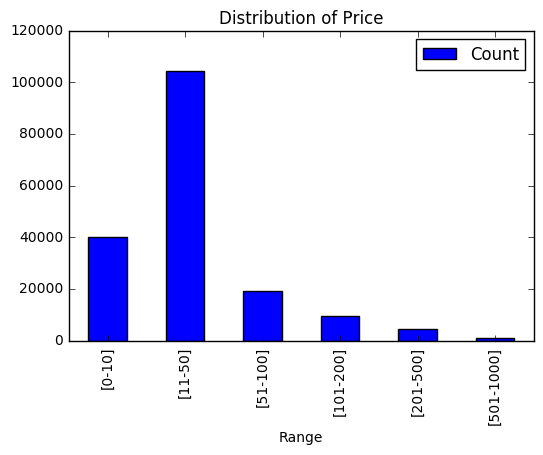

In [52]:
result.plot(x="Range",y="Count",kind="bar",title="Distribution of Price")
plt.show()

# DISTRIBUTION OF OVERALL RATING OF PRODUCTS

In [53]:
AvgRatingProd=dataset.groupby('Asin')['Rating'].mean().reset_index()

In [54]:
result_AvgRatingProd=AvgRatingProd.groupby(pd.cut(AvgRatingProd.Rating,np.arange(0, 5.1, 1))).count()
result_AvgRatingProd=result_AvgRatingProd.rename(columns={'Rating':'Count'})
result_AvgRatingProd=result_AvgRatingProd.reset_index()

In [55]:
result_AvgRatingProd[['Rating','Count']]

,Rating,Count
0,"(0, 1]",15701
1,"(1, 2]",16865
2,"(2, 3]",39809
3,"(3, 4]",88972
4,"(4, 5]",210800


In [56]:
result_AvgRatingProd[['Rating','Count']].to_csv('../Analysis/Analysis_2/Rating_Distribution.csv')

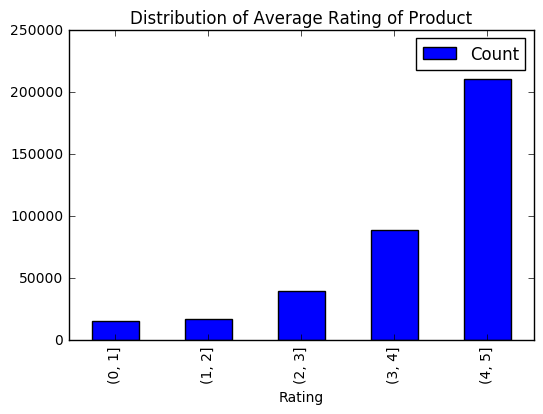

In [58]:
result_AvgRatingProd.plot(x="Rating",y="Count",kind="bar",title="Distribution of Average Rating of Product")
plt.show()

# PRODUCT PRICE V/S OVERALL RATING OF REVIEWS WRITTEN BY USERS

In [59]:
Price_vs_Rating=pd.merge(AvgRatingProd, Product_dataset, on='Asin', how='inner')

In [60]:
Price_vs_Rating.head()

,Asin,Rating,Price
0,0000031887,4.224576,6.79
1,0000037214,1.000000,6.99
2,0123456479,4.474359,64.98
3,0641997078,5.000000,47.99
4,0681256036,4.000000,17.59


Scatter plot for product price v/s overall rating

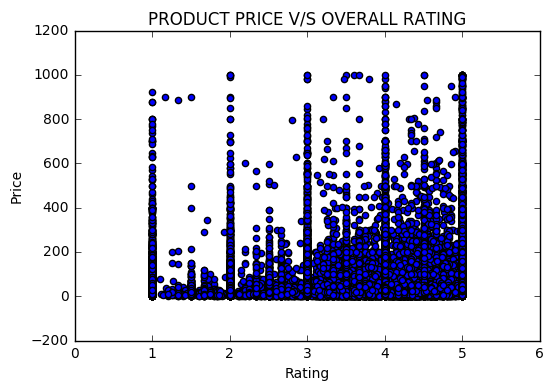

In [63]:
Price_vs_Rating.plot(x="Rating",y="Price",kind="scatter",title="PRODUCT PRICE V/S OVERALL RATING")
plt.show()

# AVERAGE REVIEW LENGTH V/S PRODUCT PRICE

In [64]:
Avg_Review_Length=dataset[['Reviewer_ID','Asin','Reviewer_Name','Review_Text']]

In [65]:
# Word count
Avg_Review_Length['Word_Length']=Avg_Review_Length['Review_Text'].apply(lambda x: len(x.split()))

In [66]:
# character count
Avg_Review_Length['Character_Length']=Avg_Review_Length['Review_Text'].apply(lambda x: len(x))

In [67]:
Avg_Review_Length2=Avg_Review_Length.groupby('Asin')['Character_Length','Word_Length'].mean().reset_index()

In [68]:
Review_Length_vs_Price=pd.merge(Avg_Review_Length2, Product_dataset, on='Asin', how='inner')

In [69]:
Review_Length_vs_Price.head()

,Asin,Character_Length,Word_Length,Price
0,0000031887,218.199153,42.292373,6.79
1,0000037214,132.000000,30.000000,6.99
2,0123456479,301.166667,57.910256,64.98
3,0641997078,111.000000,20.000000,47.99
4,0681256036,147.000000,29.000000,17.59


Scatter plot for product price v/s average review length

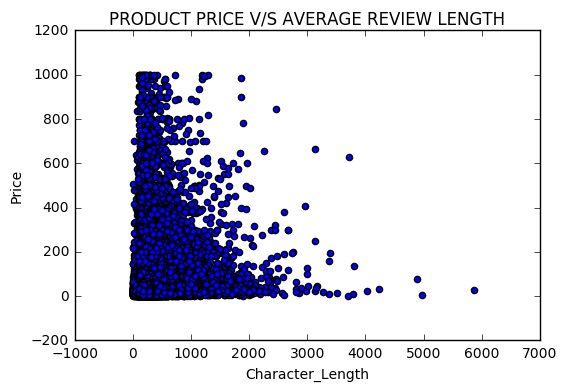

In [70]:
Review_Length_vs_Price.plot(x="Character_Length",y="Price",kind="scatter",title="PRODUCT PRICE V/S AVERAGE REVIEW LENGTH")
plt.show()

# DISTRIBUTION OF NUMBER OF REVIEWS WRITTEN BY EACH USER

In [71]:
User_Review=dataset[['Reviewer_ID','Asin']]

In [72]:
User_Review2=User_Review.groupby(['Reviewer_ID']).count().reset_index()

In [73]:
User_Review3=User_Review2.sort('Asin',ascending=False)

In [74]:
User_Review3=User_Review3.rename(columns={'Asin':'No_of_Reviews'})

In [116]:
User_Review4=User_Review3.groupby('No_of_Reviews')['Reviewer_ID'].count().reset_index()
User_Review4=User_Review4.rename(columns={'Reviewer_ID':'Count'})

In [117]:
User_Review4=User_Review4.groupby(pd.cut(User_Review4.No_of_Reviews,np.arange(0, 200, 10))).sum()
User_Review4=User_Review4.rename(columns={'No_of_Reviews':'x'})
User_Review4=User_Review4.reset_index()

In [119]:
User_Review4[['No_of_Reviews','Count']].to_csv('../Analysis/Analysis_2/DISTRIBUTION OF NUMBER OF REVIEWS.csv')

In [124]:
User_Review4[['No_of_Reviews','Count']].head()

,No_of_Reviews,Count
0,"(0, 10]",1745364.0
1,"(10, 20]",4360.0
2,"(20, 30]",601.0
3,"(30, 40]",174.0
4,"(40, 50]",49.0


Bar Chart Plot for NUMBER OF REVIEWS WRITTEN BY EACH USER

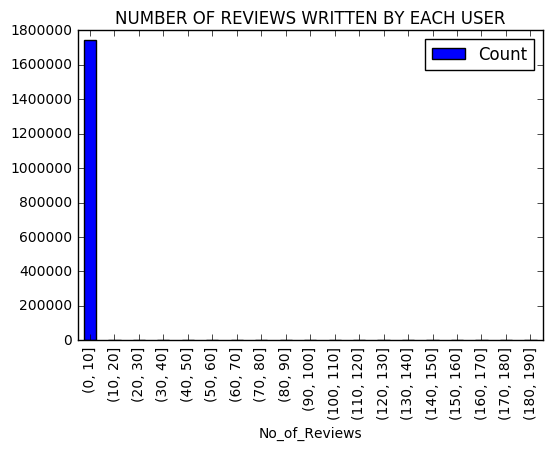

In [126]:
User_Review4.plot(x="No_of_Reviews",y="Count",kind="bar",title="NUMBER OF REVIEWS WRITTEN BY EACH USER")
plt.show()

# DISTRIBUTION OF AVERAGE RATINGS WRITTEN BY USERS

In [87]:
User_No_Rating=dataset[['Reviewer_ID','Rating']]

In [88]:
User_No_Rating2=User_No_Rating.groupby(['Reviewer_ID'])['Rating'].mean().reset_index()

In [91]:
User_No_Rating3=User_No_Rating2.groupby('Rating')['Reviewer_ID'].count().reset_index()
User_No_Rating3=User_No_Rating3.rename(columns={'Reviewer_ID':'Count'})

In [92]:
User_No_Rating3.head()

,Rating,Count
0,1.000000,116036
1,1.125000,1
2,1.142857,1
3,1.200000,8
4,1.250000,18


Scatter plot for average rating written by user.

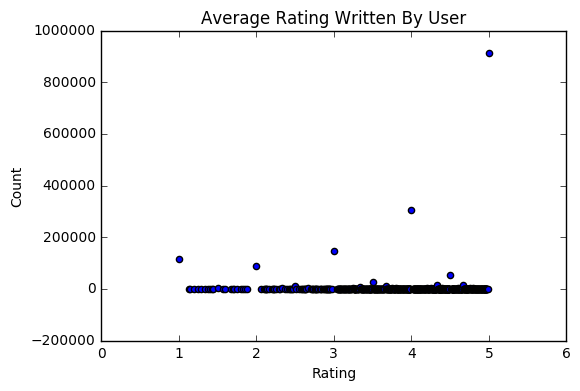

In [96]:
User_No_Rating3.plot(x="Rating",y="Count",kind="scatter",title="Average Rating Written By User")
plt.show()

# DISTRIBUTION OF HELPFULNESS OF REVIEWS WRITTEN BY USERS

In [97]:
User_No_Helpfulness=dataset[['Reviewer_ID','helpful_UpVote','Total_Votes']]

In [98]:
User_No_Helpfulness['helpful_UpVote']=User_No_Helpfulness['helpful_UpVote'].astype(float)

In [99]:
User_No_Helpfulness['Total_Votes']=User_No_Helpfulness['Total_Votes'].astype(float)

In [100]:
User_No_Helpfulness['Percentage']=(User_No_Helpfulness['helpful_UpVote']/User_No_Helpfulness['Total_Votes'])*100

In [101]:
User_No_Helpfulness=User_No_Helpfulness.fillna(0)

In [102]:
User_No_Helpfulness2=User_No_Helpfulness.groupby(['Reviewer_ID'])['Percentage'].mean().reset_index()

In [105]:
User_No_Helpfulness3=User_No_Helpfulness2.groupby('Percentage')['Reviewer_ID'].count().reset_index()
User_No_Helpfulness3=User_No_Helpfulness3.rename(columns={'Reviewer_ID':'Count'})

In [127]:
User_No_Helpfulness3=User_No_Helpfulness3.groupby(pd.cut(User_No_Helpfulness3.Percentage,np.arange(0, 101, 10))).count()
User_No_Helpfulness3=User_No_Helpfulness3.rename(columns={'Percentage':'x'})
User_No_Helpfulness3=User_No_Helpfulness3.reset_index()

In [129]:
User_No_Helpfulness3[['Percentage','Count']].head()

,Percentage,Count
0,"(0, 10]",258
1,"(10, 20]",426
2,"(20, 30]",729
3,"(30, 40]",903
4,"(40, 50]",1253


In [130]:
User_No_Helpfulness3[['Percentage','Count']].to_csv('../Analysis/Analysis_2/DISTRIBUTION OF HELPFULNESS.csv')

Bar chart plot for DISTRIBUTION OF HELPFULNESS of reviews written by user.

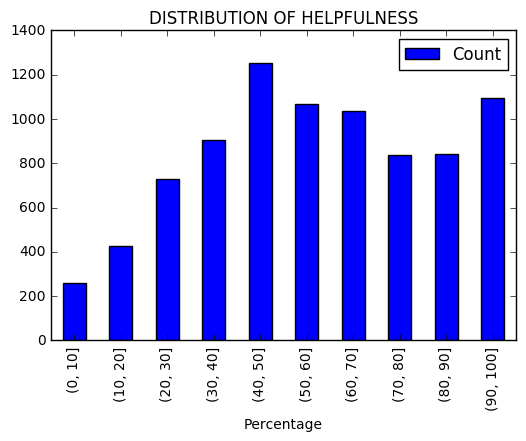

In [133]:
User_No_Helpfulness3.plot(x="Percentage",y="Count",kind="bar",title="DISTRIBUTION OF HELPFULNESS")
plt.show()

# AVERAGE RATING V/S AVERAGE HELPFULNESS WRITTEN BY USER

In [134]:
Rating_vs_helpfulness=dataset[['Reviewer_ID','Rating','helpful_UpVote','Total_Votes']]

In [135]:
Rating_vs_helpfulness['helpful_UpVote']=Rating_vs_helpfulness['helpful_UpVote'].astype(float)

In [136]:
Rating_vs_helpfulness['Total_Votes']=Rating_vs_helpfulness['Total_Votes'].astype(float)

In [137]:
Rating_vs_helpfulness['Percentage']=(Rating_vs_helpfulness['helpful_UpVote']/Rating_vs_helpfulness['Total_Votes'])*100

In [138]:
Rating_vs_helpfulness=Rating_vs_helpfulness.fillna(0)

In [139]:
Rating_vs_helpfulness.head()

,Reviewer_ID,Rating,helpful_UpVote,Total_Votes,Percentage
0,A2XVJBSRI3SWDI,5.0,0.0,0.0,0.0
1,A2G0LNLN79Q6HR,4.0,1.0,1.0,100.0
2,A2R3K1KX09QBYP,2.0,1.0,1.0,100.0
3,A19PBP93OF896,1.0,0.0,1.0,0.0
4,A1P0IHU93EF9ZK,4.0,0.0,0.0,0.0


In [140]:
Rating_vs_helpfulness2=Rating_vs_helpfulness.groupby(['Reviewer_ID'])[['Percentage','Rating']].mean().reset_index()

In [144]:
Rating_vs_helpfulness2.to_csv('../Analysis/Analysis_2/AVERAGE RATING VS AVERAGE HELPFULNESS.csv')

In [146]:
Rating_vs_helpfulness2.head()

,Reviewer_ID,Percentage,Rating
0,A0000188NWOSI5X2PMSN,0.0,1.0
1,A000063614T1OE0BUSKUT,0.0,5.0
2,A0002456YBKJT11R5AZQ,0.0,4.0
3,A00028781NF0U7YEN9U19,0.0,5.0
4,A00031045Q68JAQ1UYT,100.0,1.0


Scatter Plot for AVERAGE RATING V/S AVERAGE HELPFULNESS 

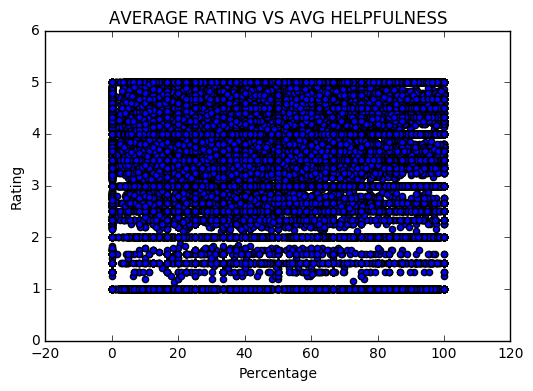

In [148]:
Rating_vs_helpfulness2.plot(x="Percentage",y="Rating",kind="scatter",title="AVERAGE RATING VS AVG HELPFULNESS")
plt.show()

# HELPFULNESS VS AVERAGE LENGTH WRITTEN BY USERS

In [149]:
Helpfulness_vs_Length=dataset[['Reviewer_ID','helpful_UpVote','Total_Votes','Review_Text']]

In [150]:
# character count
Helpfulness_vs_Length['Character_Length']=Helpfulness_vs_Length['Review_Text'].apply(lambda x: len(x))

In [157]:
# Word count
Helpfulness_vs_Length['Word_Length']=Helpfulness_vs_Length['Review_Text'].apply(lambda x: len(x.split()))

In [158]:
Helpfulness_vs_Length['helpful_UpVote']=Helpfulness_vs_Length['helpful_UpVote'].astype(float)

In [159]:
Helpfulness_vs_Length['Total_Votes']=Helpfulness_vs_Length['Total_Votes'].astype(float)

In [160]:
Helpfulness_vs_Length['Percentage']=(Helpfulness_vs_Length['helpful_UpVote']/Helpfulness_vs_Length['Total_Votes'])*100

In [161]:
Helpfulness_vs_Length=Helpfulness_vs_Length.fillna(0)

In [162]:
Helpfulness_vs_Length2=Helpfulness_vs_Length.groupby(['Reviewer_ID'])[['Percentage','Character_Length','Word_Length']].mean().reset_index()

In [164]:
Helpfulness_vs_Length2.head()

,Reviewer_ID,Percentage,Character_Length,Word_Length
0,A0000188NWOSI5X2PMSN,0.0,208.0,40.0
1,A000063614T1OE0BUSKUT,0.0,300.0,56.0
2,A0002456YBKJT11R5AZQ,0.0,179.0,36.0
3,A00028781NF0U7YEN9U19,0.0,101.0,20.0
4,A00031045Q68JAQ1UYT,100.0,216.0,36.0


In [165]:
Helpfulness_vs_Length2.to_csv('../Analysis/Analysis_2/HELPFULNESS VS AVERAGE LENGTH.csv')

Scatter Plot for HELPFULNESS VS AVERAGE LENGTH

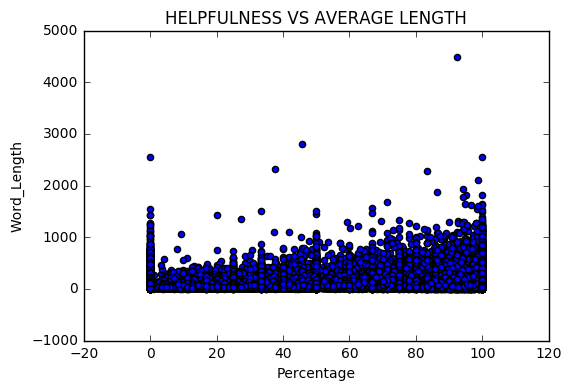

In [166]:
Helpfulness_vs_Length2.plot(x="Percentage",y="Word_Length",kind="scatter",title="HELPFULNESS VS AVERAGE LENGTH")
plt.show()